# Part I: Preprocessing and EDA
The data comes from a global e-retailer company, including orders from 2012 to 2015. Import the Orders dataset and do some basic EDA.

For problem 1 to 3, we mainly focus on data cleaning and data visualizations. You can use all the packages that you are familiar with to conduct some plots and also provide brief interpretations about your findings.

In [1]:
import pandas as pd
import numpy as np
import re
import datetime
pd.set_option('display.max_columns', 300)

In [3]:
df_orders = pd.read_csv('./data/Orders.csv')
df_orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [4]:
df_orders.shape

(51290, 24)

In [5]:
df_orders.dtypes

Row.ID              int64
Order.ID           object
Order.Date         object
Ship.Date          object
Ship.Mode          object
Customer.ID        object
Customer.Name      object
Segment            object
Postal.Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product.ID         object
Category           object
Sub.Category       object
Product.Name       object
Sales              object
Quantity            int64
Discount          float64
Profit             object
Shipping.Cost     float64
Order.Priority     object
dtype: object

## Problem 1: Dataset Import & Cleaning
Check “Profit” and “Sales” in the dataset, convert these two columns to numeric type.

In [6]:
np.sum(df_orders.isnull())

Row.ID                0
Order.ID              0
Order.Date            0
Ship.Date             0
Ship.Mode             0
Customer.ID           0
Customer.Name         0
Segment               0
Postal.Code       41296
City                  0
State                 0
Country               0
Region                0
Market                0
Product.ID            0
Category              0
Sub.Category          0
Product.Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping.Cost         0
Order.Priority        0
dtype: int64

In [7]:
df_orders[['Profit', 'Sales']].head()

,Profit,Sales
0,$62.15,$221.98
1,-$288.77,"$3,709.40"
2,$919.97,"$5,175.17"
3,-$96.54,"$2,892.51"
4,$311.52,"$2,832.96"


In [8]:
df_orders['Profit'] = df_orders['Profit'].apply(lambda x: x.replace(',', ''))
df_orders['Profit'] = df_orders['Profit'].apply(lambda x: x.replace('$', ''))
df_orders['Profit'] = df_orders['Profit'].astype(float)
df_orders['Sales'] = df_orders['Sales'].apply(lambda x: x.replace(',', ''))
df_orders['Sales'] = df_orders['Sales'].apply(lambda x: x.replace('$', ''))
df_orders['Sales'] = df_orders['Sales'].astype(float)
df_orders[['Profit', 'Sales']].head()

,Profit,Sales
0,62.15,221.98
1,-288.77,3709.40
2,919.97,5175.17
3,-96.54,2892.51
4,311.52,2832.96


In [9]:
df_orders[['Profit', 'Sales']].dtypes

Profit    float64
Sales     float64
dtype: object

## Problem 2: Inventory Management
Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. Your manager is making plans for next year’s inventory.
<br> He wants you to answer the following questions:
- Is there any seasonal trend of inventory in the company?
- Is the seasonal trend the same for different categories?

Hint: For each order, it has an attribute called Quantity that indicates the number of product in the order. If an order contains more than one product, there will be multiple observations of the same order.

In [10]:
df_orders[df_orders.duplicated(keep=False)]

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority


In [11]:
df_orders['Order.Date'] = pd.to_datetime(df_orders['Order.Date'])
df_orders['Ship.Date'] = pd.to_datetime(df_orders['Ship.Date'])
df_orders[['Order.Date', 'Ship.Date']].dtypes

Order.Date    datetime64[ns]
Ship.Date     datetime64[ns]
dtype: object

In [12]:
df_orders['Category'].unique()

array(['Technology', 'Furniture', 'Office Supplies'], dtype=object)

In [13]:
df_orders['Order.Month'] = df_orders['Order.Date'].dt.month
df_orders[['Order.Date', 'Order.Month']].head()

,Order.Date,Order.Month
0,2014-11-11,11
1,2014-02-05,2
2,2014-10-17,10
3,2014-01-28,1
4,2014-11-05,11


In [14]:
df_orders['Order.Month'].dtype

dtype('int64')

In [15]:
df_orders_tech = df_orders[df_orders['Category'] == 'Technology']
df_orders_tech.shape

(10141, 25)

In [16]:
df_orders_furn = df_orders[df_orders['Category'] == 'Furniture']
df_orders_furn.shape

(9860, 25)

In [17]:
df_orders_offi = df_orders[df_orders['Category'] == 'Office Supplies']
df_orders_offi.shape

(31289, 25)

In [18]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [19]:
df_orders_tech.groupby('Order.Month').agg({'Quantity':['sum']})

,Quantity
,sum
Order.Month,
1,1642
2,1595
3,2009
4,2070
5,2542
6,3563
7,2271
8,3518


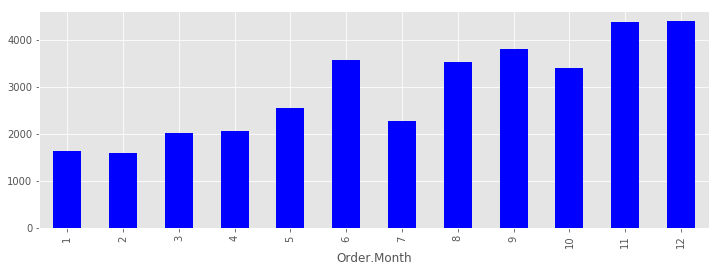

In [20]:
plt.figure(figsize = (12,4))
df_orders_tech.groupby('Order.Month')['Quantity'].sum().plot.bar(color = 'b')

In [21]:
df_orders_furn.groupby('Order.Month').agg({'Quantity':['sum']})

,Quantity
,sum
Order.Month,
1,1750
2,1494
3,2098
4,2005
5,2484
6,3434
7,2157
8,3059


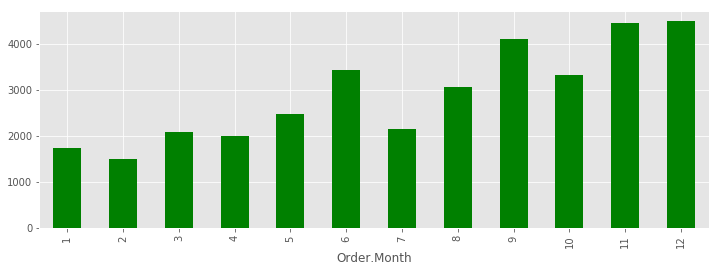

In [22]:
plt.figure(figsize = (12,4))
df_orders_furn.groupby('Order.Month')['Quantity'].sum().plot.bar(color = 'g')

In [23]:
df_orders_offi.groupby('Order.Month').agg({'Quantity':['sum']})

,Quantity
,sum
Order.Month,
1,5480
2,4340
3,6283
4,6391
5,8170
6,11012
7,6618
8,11019


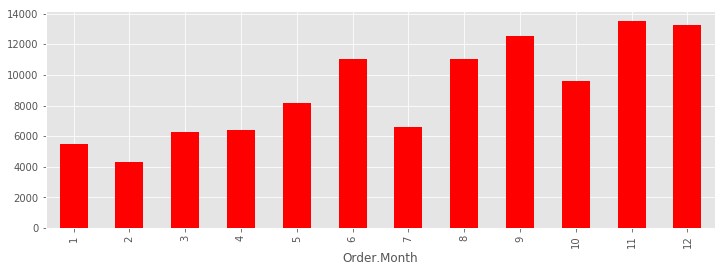

In [24]:
plt.figure(figsize = (12,4))
df_orders_offi.groupby('Order.Month')['Quantity'].sum().plot.bar(color = 'r')

## Problem 3: Why did customers make returns?
Your manager required you to give a brief report (Plots + Interpretations) on returned orders.

Hint: Merge the Returns dataframe with the Orders dataframe using Order.ID.

In [25]:
df_returns = pd.read_csv('./data/Returns.csv')
df_returns.head()

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [26]:
df_returns.dtypes

Returned    object
Order ID    object
Region      object
dtype: object

In [27]:
df_returns.shape

(1079, 3)

In [28]:
np.sum(df_returns.isnull())

Returned    0
Order ID    0
Region      0
dtype: int64

In [29]:
df_returns['Returned'].unique()

array(['Yes'], dtype=object)

In [30]:
df_returns = df_returns.drop(['Region'], 1) 
df_all = pd.merge(df_orders, df_returns, how = 'left', left_on = 'Order.ID', right_on = 'Order ID')
df_all.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Returned,Order ID
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,11,NaN,NaN
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,2,NaN,NaN
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,10,NaN,NaN
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,1,NaN,NaN
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,11,NaN,NaN


In [31]:
df_all['Returned'].unique()

array([nan, 'Yes'], dtype=object)

In [32]:
df_all = df_all.drop(['Order ID'], 1) 
np.sum(df_all.isnull())

Row.ID                0
Order.ID              0
Order.Date            0
Ship.Date             0
Ship.Mode             0
Customer.ID           0
Customer.Name         0
Segment               0
Postal.Code       41296
City                  0
State                 0
Country               0
Region                0
Market                0
Product.ID            0
Category              0
Sub.Category          0
Product.Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping.Cost         0
Order.Priority        0
Order.Month           0
Returned          49070
dtype: int64

In [33]:
df_all['Returned'] = df_all['Returned'].fillna('No')

In [34]:
df_all = df_all.drop(['Postal.Code'], 1) 
np.sum(df_all.isnull())

Row.ID            0
Order.ID          0
Order.Date        0
Ship.Date         0
Ship.Mode         0
Customer.ID       0
Customer.Name     0
Segment           0
City              0
State             0
Country           0
Region            0
Market            0
Product.ID        0
Category          0
Sub.Category      0
Product.Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping.Cost     0
Order.Priority    0
Order.Month       0
Returned          0
dtype: int64

In [35]:
df_all.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Returned
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,11,No
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,2,No
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,10,No
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,1,No
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,11,No


- How much profit did we lose due to returns each year?

In [36]:
df_all['Order.Date'].dt.year.unique()

array([2014, 2012, 2013, 2015], dtype=int64)

In [37]:
df_yearly_lose = pd.DataFrame({'Year': [2012, 2013, 2014, 2015],
                               'Return.Lose': [0.0, 0.0, 0.0, 0.0]})

In [38]:
df_yearly_lose.iloc[0, 1] = sum(df_all[(df_all['Returned'] == 'Yes') & (df_all['Order.Date'].dt.year == 2012)]['Profit'])
df_yearly_lose.iloc[1, 1] = sum(df_all[(df_all['Returned'] == 'Yes') & (df_all['Order.Date'].dt.year == 2013)]['Profit'])
df_yearly_lose.iloc[2, 1] = sum(df_all[(df_all['Returned'] == 'Yes') & (df_all['Order.Date'].dt.year == 2014)]['Profit'])
df_yearly_lose.iloc[3, 1] = sum(df_all[(df_all['Returned'] == 'Yes') & (df_all['Order.Date'].dt.year == 2015)]['Profit'])
df_yearly_lose

,Year,Return.Lose
0,2012,17477.26
1,2013,9269.89
2,2014,17510.63
3,2015,17112.97


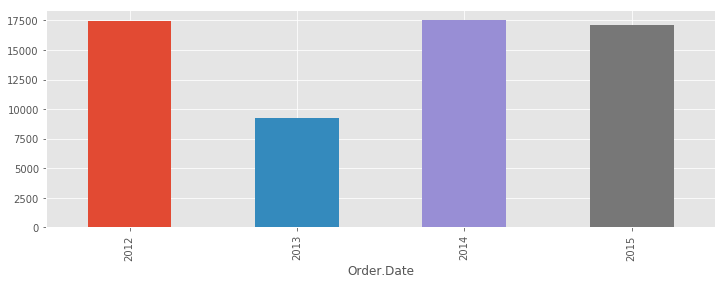

In [39]:
plt.figure(figsize = (12,4))
df_all[(df_all['Returned'] == 'Yes')].groupby(df_all['Order.Date'].dt.year)['Profit'].sum().plot.bar()

- How many customer returned more than once? more than 5 times?

In [40]:
df_customer_return = df_all[df_all['Returned'] == 'Yes'].groupby('Customer.ID').agg({'Returned':['count']})
df_customer_return.columns = df_customer_return.columns.droplevel(1)
df_customer_return.head()

,Returned
Customer.ID,
AA-1031558,1
AA-106451404,1
AA-1064559,3
AA-1064564,1
AA-645137,1


In [41]:
len(df_customer_return[df_customer_return['Returned'] > 1])

547

In [42]:
len(df_customer_return[df_customer_return['Returned'] > 5])

46

C:\Users\Xu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'Returned' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  


<Figure size 864x288 with 0 Axes>

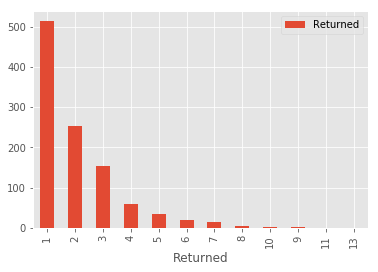

In [43]:
plt.figure(figsize = (12,4))
df_customer_return.groupby(df_customer_return['Returned'].astype(str)).count().sort_values('Returned', ascending = False).plot.bar()

- Which regions are more likely to return orders?

In [44]:
df_all['Sub.Category'].unique()

array(['Phones', 'Chairs', 'Copiers', 'Tables', 'Bookcases', 'Art',
       'Appliances', 'Storage', 'Fasteners', 'Machines', 'Accessories',
       'Furnishings', 'Binders', 'Labels', 'Paper', 'Supplies',
       'Envelopes'], dtype=object)

<Figure size 864x288 with 0 Axes>

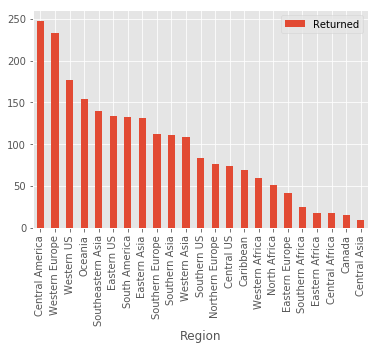

In [45]:
df_region_return = df_all[df_all['Returned'] == 'Yes'].groupby('Region').agg({'Returned':['count']})
df_region_return.columns = df_region_return.columns.droplevel(1)
plt.figure(figsize = (12,4))
df_region_return.sort_values('Returned', ascending = False).plot.bar()

- Which categories (sub-categories) of products are more likely to be returned?

<Figure size 864x288 with 0 Axes>

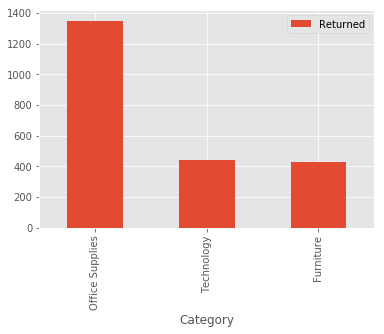

In [46]:
df_category_return = df_all[df_all['Returned'] == 'Yes'].groupby('Category').agg({'Returned':['count']})
df_category_return.columns = df_category_return.columns.droplevel(1)
plt.figure(figsize = (12,4))
df_category_return.sort_values('Returned', ascending = False).plot.bar()

<Figure size 864x288 with 0 Axes>

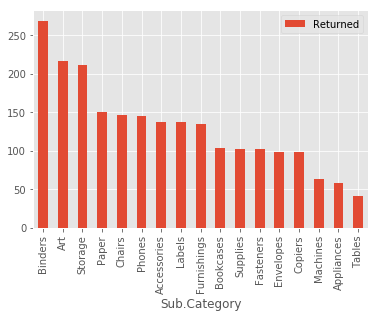

In [47]:
df_subcate_return = df_all[df_all['Returned'] == 'Yes'].groupby('Sub.Category').agg({'Returned':['count']})
df_subcate_return.columns = df_subcate_return.columns.droplevel(1)
plt.figure(figsize = (12,4))
df_subcate_return.sort_values('Returned', ascending = False).plot.bar()

# Part II: Machine Learning and Business Use Case
Now your manager has a basic understanding of why customers returned orders. Next, he wants you to use machine learning to predict which orders are most likely to be returned. In this part, you will generate several features based on our previous findings and your manager’s requirements.

## Problem 4: Feature Engineering
***Step 1: Create the dependent variable***

First of all, we need to generate a categorical variable which indicates whether an order has been returned or not.

Hint: the returned order's IDs are contained in the dataset "returns"

In [48]:
# Already done:
df_all['Returned'].value_counts()

No     49070
Yes     2220
Name: Returned, dtype: int64

In [49]:
100*2220/(49070+2220)

4.328329108988107

***Step 2:***

Your manager believes that how long it took the order to ship would affect whether the customer would return it or not.
He wants you to generate a feature which can measure how long it takes the company to process each order.

Hint: Process.Time = Ship.Date - Order.Date

In [50]:
df_all['Order.Date'] = pd.to_datetime(df_all['Order.Date'])
df_all['Ship.Date'] = pd.to_datetime(df_all['Ship.Date'])
df_all[['Order.Date', 'Ship.Date']].head()

,Order.Date,Ship.Date
0,2014-11-11,2014-11-13
1,2014-02-05,2014-02-07
2,2014-10-17,2014-10-18
3,2014-01-28,2014-01-30
4,2014-11-05,2014-11-06


In [51]:
(df_all['Ship.Date'] - df_all['Order.Date']).value_counts()

4 days    14434
5 days    11221
2 days     7026
6 days     6255
3 days     5035
7 days     3057
0 days     2600
1 days     1662
dtype: int64

In [52]:
df_all['Process.Time'] = df_all['Ship.Date'] - df_all['Order.Date']
df_all['Process.Time'].head()

0   2 days
1   2 days
2   1 days
3   2 days
4   1 days
Name: Process.Time, dtype: timedelta64[ns]

In [53]:
df_all['Process.Time'].dtype

dtype('<m8[ns]')

***Step 3:***

If a product has been returned before, it may be returned again.
Let us generate a feature indices how many times the product has been returned before.
If it never got returned, we just impute using 0.

Hint: Group by different Product.ID

In [54]:
df_all.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'City', 'State', 'Country',
       'Region', 'Market', 'Product.ID', 'Category', 'Sub.Category',
       'Product.Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping.Cost', 'Order.Priority', 'Order.Month', 'Returned',
       'Process.Time'],
      dtype='object')

In [55]:
count_return = pd.DataFrame(df_all[df_all['Returned'] == 'Yes'].groupby(['Product.ID'])['Returned'].agg('count'))
count_return = count_return.reset_index()
count_return.columns = ['Product.ID', 'Returned.Before']
count_return.head()

,Product.ID,Returned.Before
0,FUR-BO-3176,1
1,FUR-BO-3615,1
2,FUR-BO-3616,1
3,FUR-BO-3621,1
4,FUR-BO-3624,2


In [56]:
df_all = pd.merge(df_all, count_return, how = 'left', on = ['Product.ID'])
df_all['Returned.Before'] = df_all['Returned.Before'].fillna(0.0).astype(int)
df_all.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Returned,Process.Time,Returned.Before
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,11,No,2 days,0
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,2,No,2 days,2
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,10,No,1 days,2
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,1,No,2 days,0
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,11,No,1 days,0


## Problem 5: Fitting Models
You can use any binary classification method you have learned so far.

Double check the column types before you fit the model.
<br>Only include useful features. i.e all the IDs should be excluded from your training set.

In [57]:
del df_orders, df_returns

In [58]:
df_all['Process.Time'] = df_all['Process.Time'].astype('timedelta64[D]').astype(int)
df_all['Process.Time'].dtype

dtype('int32')

In [59]:
df_all.head(3)

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Returned,Process.Time,Returned.Before
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,11,No,2,0
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,2,No,2,2
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,10,No,1,2


In [61]:
df_all = df_all.drop(['Row.ID'], 1)
df_all = df_all.drop(['Order.ID'], 1)
df_all = df_all.drop(['Customer.Name'], 1)
df_all = df_all.drop(['Customer.ID'], 1)
df_all = df_all.drop(['Product.Name'], 1)
df_all = df_all.drop(['Product.ID'], 1)
df_all = df_all.drop(['Market'], 1)

In [63]:
df_all.head(3)

,Order.Date,Ship.Date,Ship.Mode,Segment,City,State,Country,Region,Market,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Returned,Process.Time,Returned.Before
0,2014-11-11,2014-11-13,First Class,Consumer,Oklahoma City,Oklahoma,United States,Central US,USCA,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,11,No,2,0
1,2014-02-05,2014-02-07,Second Class,Corporate,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,2,No,2,2
2,2014-10-17,2014-10-18,First Class,Consumer,Brisbane,Queensland,Australia,Oceania,Asia Pacific,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,10,No,1,2


In [62]:
df_all.dtypes

Order.Date         datetime64[ns]
Ship.Date          datetime64[ns]
Ship.Mode                  object
Segment                    object
City                       object
State                      object
Country                    object
Region                     object
Market                     object
Category                   object
Sub.Category               object
Product.Name               object
Sales                     float64
Quantity                    int64
Discount                  float64
Profit                    float64
Shipping.Cost             float64
Order.Priority             object
Order.Month                 int64
Returned                   object
Process.Time                int32
Returned.Before             int32
dtype: object

In [64]:
df_label_all = df_all.copy()

In [65]:
df_label_all['Ship.Mode'].value_counts()

Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: Ship.Mode, dtype: int64

In [67]:
label_ship_mode = {'Standard Class': '1', 'Second Class': '2', 'First Class':'3', 'Same Day': '4'}
df_label_all = df_label_all.replace({'Ship.Mode': label_ship_mode})
df_label_all['Ship.Mode'] = df_label_all['Ship.Mode'].astype(int)
df_label_all.head(3)

,Order.Date,Ship.Date,Ship.Mode,Segment,City,State,Country,Region,Market,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Returned,Process.Time,Returned.Before
0,2014-11-11,2014-11-13,3,Consumer,Oklahoma City,Oklahoma,United States,Central US,USCA,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,11,No,2,0
1,2014-02-05,2014-02-07,2,Corporate,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,2,No,2,2
2,2014-10-17,2014-10-18,3,Consumer,Brisbane,Queensland,Australia,Oceania,Asia Pacific,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,10,No,1,2


In [68]:
df_label_all['Segment'].value_counts()

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

In [69]:
label_segment = {'Consumer': '1', 'Corporate': '2', 'Home Office':'3'}
df_label_all = df_label_all.replace({'Segment': label_segment})
df_label_all['Segment'] = df_label_all['Segment'].astype(int)
df_label_all.head(3)

,Order.Date,Ship.Date,Ship.Mode,Segment,City,State,Country,Region,Market,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Returned,Process.Time,Returned.Before
0,2014-11-11,2014-11-13,3,1,Oklahoma City,Oklahoma,United States,Central US,USCA,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,11,No,2,0
1,2014-02-05,2014-02-07,2,2,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,2,No,2,2
2,2014-10-17,2014-10-18,3,1,Brisbane,Queensland,Australia,Oceania,Asia Pacific,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,10,No,1,2


In [70]:
df_label_all['Returned'].value_counts()

No     49070
Yes     2220
Name: Returned, dtype: int64

In [71]:
label_returned = {'No': '0', 'Yes': '1'}
df_label_all = df_label_all.replace({'Returned': label_returned})
df_label_all['Returned'] = df_label_all['Returned'].astype(int)
df_label_all.head(2)

,Order.Date,Ship.Date,Ship.Mode,Segment,City,State,Country,Region,Market,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Returned,Process.Time,Returned.Before
0,2014-11-11,2014-11-13,3,1,Oklahoma City,Oklahoma,United States,Central US,USCA,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,11,0,2,0
1,2014-02-05,2014-02-07,2,2,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,2,0,2,2


In [72]:
df_label_all['Order.Priority'].value_counts()

Medium      29433
High        15501
Critical     3932
Low          2424
Name: Order.Priority, dtype: int64

In [74]:
label_priority = {'Low': '1', 'Medium': '2', 'High': '3', 'Critical': '4'}
df_label_all = df_label_all.replace({'Order.Priority': label_priority})
df_label_all['Order.Priority'] = df_label_all['Order.Priority'].astype(int)
df_label_all.head(2)

,Order.Date,Ship.Date,Ship.Mode,Segment,City,State,Country,Region,Market,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Returned,Process.Time,Returned.Before
0,2014-11-11,2014-11-13,3,1,Oklahoma City,Oklahoma,United States,Central US,USCA,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,3,11,0,2,0
1,2014-02-05,2014-02-07,2,2,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,4,2,0,2,2


In [76]:
df_label_all['Category'].value_counts()

Office Supplies    31289
Technology         10141
Furniture           9860
Name: Category, dtype: int64

In [78]:
label_category = {'Office Supplies': '1', 'Technology': '2', 'Furniture': '3'}
df_label_all = df_label_all.replace({'Category': label_category})
df_label_all['Category'] = df_label_all['Category'].astype(int)
df_label_all.head(2)

,Order.Date,Ship.Date,Ship.Mode,Segment,City,State,Country,Region,Market,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Returned,Process.Time,Returned.Before
0,2014-11-11,2014-11-13,3,1,Oklahoma City,Oklahoma,United States,Central US,USCA,2,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,3,11,0,2,0
1,2014-02-05,2014-02-07,2,2,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,3,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,4,2,0,2,2


In [77]:
df_label_all['Sub.Category'].value_counts()

Binders        6146
Storage        5049
Art            4864
Paper          3492
Chairs         3434
Phones         3357
Furnishings    3154
Accessories    3075
Labels         2601
Fasteners      2601
Bookcases      2411
Supplies       2407
Envelopes      2387
Copiers        2223
Appliances     1742
Machines       1486
Tables          861
Name: Sub.Category, dtype: int64

In [79]:
label_sub_category = {'Binders': '1', 'Storage': '2', 'Art': '3',
                      'Paper': '4', 'Chairs': '5', 'Phones': '6', 
                      'Furnishings': '7', 'Accessories': '8', 'Labels': '9', 
                      'Fasteners': '10', 'Bookcases': '11', 'Supplies': '12', 
                      'Envelopes': '13', 'Copiers': '14', 'Appliances': '15', 
                      'Machines': '16', 'Tables': '17'}
df_label_all = df_label_all.replace({'Sub.Category': label_sub_category})
df_label_all['Sub.Category'] = df_label_all['Sub.Category'].astype(int)
df_label_all.head(2)

,Order.Date,Ship.Date,Ship.Mode,Segment,City,State,Country,Region,Market,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Returned,Process.Time,Returned.Before
0,2014-11-11,2014-11-13,3,1,Oklahoma City,Oklahoma,United States,Central US,USCA,2,6,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,3,11,0,2,0
1,2014-02-05,2014-02-07,2,2,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,3,5,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,4,2,0,2,2


In [80]:
df_label_all['Region'].value_counts()

Western Europe       5883
Central America      5616
Oceania              3487
Western US           3203
Southeastern Asia    3129
South America        2988
Eastern US           2848
Southern Asia        2655
Western Asia         2440
Eastern Asia         2374
Central US           2323
Northern Europe      2204
Southern Europe      2113
Caribbean            1690
Southern US          1620
Eastern Europe       1529
Western Africa       1460
North Africa         1278
Eastern Africa        728
Central Africa        643
Southern Africa       478
Canada                384
Central Asia          217
Name: Region, dtype: int64

In [81]:
label_region = {'Western Europe': '1', 'Central America': '2', 'Oceania': '3', 'Western US': '4', 
                'Southeastern Asia': '5', 'South America': '6', 'Eastern US': '7', 'Southern Asia': '8',
                'Western Asia': '9', 'Eastern Asia': '10', 'Central US': '11', 'Northern Europe': '12', 
                'Southern Europe': '13', 'Caribbean': '14', 'Southern US': '15', 'Eastern Europe': '16',
                'Western Africa': '17', 'North Africa': '18', 'Eastern Africa': '19', 'Central Africa': '20', 
                'Southern Africa': '21', 'Canada': '22', 'Central Asia': '23'}
df_label_all = df_label_all.replace({'Region': label_region})
df_label_all['Region'] = df_label_all['Region'].astype(int)
df_label_all.head(2)

,Order.Date,Ship.Date,Ship.Mode,Segment,City,State,Country,Region,Market,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Returned,Process.Time,Returned.Before
0,2014-11-11,2014-11-13,3,1,Oklahoma City,Oklahoma,United States,11,USCA,2,6,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,3,11,0,2,0
1,2014-02-05,2014-02-07,2,2,Wollongong,New South Wales,Australia,3,Asia Pacific,3,5,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,4,2,0,2,2


In [88]:
df_label_all = df_label_all.drop(['Product.Name'], 1)
df_label_all = df_label_all.drop(['Market'], 1)

In [84]:
from sklearn.preprocessing import LabelEncoder

In [90]:
for c in df_label_all.columns:
    if df_label_all[c].dtype == 'object':
        le = LabelEncoder()
        # Need to convert the column type to string in order to encode missing values
        df_label_all[c] = le.fit_transform(df_label_all[c].astype(str))

In [91]:
df_label_all.head()

,Order.Date,Ship.Date,Ship.Mode,Segment,City,State,Country,Region,Category,Sub.Category,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Returned,Process.Time,Returned.Before
0,2014-11-11,2014-11-13,3,1,2368,754,156,11,2,6,221.98,2,0.0,62.15,40.77,3,11,0,2,0
1,2014-02-05,2014-02-07,2,2,3532,709,6,3,3,5,3709.40,9,0.1,-288.77,923.63,4,2,0,2,2
2,2014-10-17,2014-10-18,3,1,499,828,6,3,2,6,5175.17,9,0.1,919.97,915.49,2,10,0,1,2
3,2014-01-28,2014-01-30,3,3,376,149,54,1,2,6,2892.51,5,0.1,-96.54,910.16,2,1,0,2,0
4,2014-11-05,2014-11-06,4,1,859,277,124,17,2,14,2832.96,8,0.0,311.52,903.04,4,11,0,1,0


In [92]:
df_label_all.dtypes

Order.Date         datetime64[ns]
Ship.Date          datetime64[ns]
Ship.Mode                   int32
Segment                     int32
City                        int64
State                       int64
Country                     int64
Region                      int32
Category                    int32
Sub.Category                int32
Sales                     float64
Quantity                    int64
Discount                  float64
Profit                    float64
Shipping.Cost             float64
Order.Priority              int32
Order.Month                 int64
Returned                    int32
Process.Time                int32
Returned.Before             int32
dtype: object

In [93]:
df_label = df_label_all.copy()
df_label = df_label.drop(['Order.Date'], 1) 
df_label = df_label.drop(['Ship.Date'], 1) 

In [96]:
df_tg = df_label.pop('Returned')
df_label['Returned'] = df_tg
df_label.head(2)

,Ship.Mode,Segment,City,State,Country,Region,Category,Sub.Category,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Process.Time,Returned.Before,Returned
0,3,1,2368,754,156,11,2,6,221.98,2,0.0,62.15,40.77,3,11,2,0,0
1,2,2,3532,709,6,3,3,5,3709.40,9,0.1,-288.77,923.63,4,2,2,2,0


In [97]:
del df_tg

Use 80/20 training and test splits to build your model.
<br>Not that there are only less than 5% of the orders have been returned, so you should consider using the createDataPartition function from caret package that does a stratified random split of the data. Scikit-learn also has a StratifiedKfold function that does similar thing.

Don't forget to set.seed() before the spilt to make your result reproducible.

Note: We are not looking for the best tuned model in the lab so don’t spend too much time on grid search. Focus on model evaluation and the business use case of each model.

In [98]:
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, train_test_split
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold

In [114]:
X = df_label.copy()
X = X.drop(['Returned'], 1)
X.head(2)

,Ship.Mode,Segment,City,State,Country,Region,Category,Sub.Category,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Process.Time,Returned.Before
0,3,1,2368,754,156,11,2,6,221.98,2,0.0,62.15,40.77,3,11,2,0
1,2,2,3532,709,6,3,3,5,3709.40,9,0.1,-288.77,923.63,4,2,2,2


In [115]:
y = df_label['Returned']
y.head(2)

0    0
1    0
Name: Returned, dtype: int32

In [116]:
X.shape, y.shape

((51290, 17), (51290,))

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Problem 6: Evaluating Models
What is the best metric to evaluate your model. Is accuracy good for this case?
<br>Now you have multiple models, which one would you pick?
<br>Can you get any clue from the confusion matrix? What is the meaning of precision and recall in this case? Which one do you care the most? How will your model help the manager make decisions?

Note: The last question is open-ended. Your answer could be completely different depending on your understanding of this business problem.

In [106]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [107]:
linreg_1 = LinearRegression()

In [127]:
clf = linreg_1.fit(X_train, y_train)
clf.score(X_test, y_test)

0.029036555109398506

In [111]:
logit_1 = LogisticRegression()

In [126]:
clf = logit_1.fit(X_train, y_train)
clf.score(X_test, y_test)

0.959348800935855

In [119]:
from sklearn.tree import DecisionTreeClassifier

In [120]:
tree_1 = DecisionTreeClassifier()

In [129]:
tree_1.fit(X_train, y_train)
tree_1.score(X_test, y_test)

0.9232793916942874

In [130]:
tree_1.feature_importances_

array([0.01488258, 0.02517384, 0.1296827 , 0.08772635, 0.05763931,
       0.03821106, 0.01042599, 0.0448056 , 0.10848823, 0.04308701,
       0.01936962, 0.11238391, 0.10903472, 0.03181366, 0.06889589,
       0.05269466, 0.04568486])

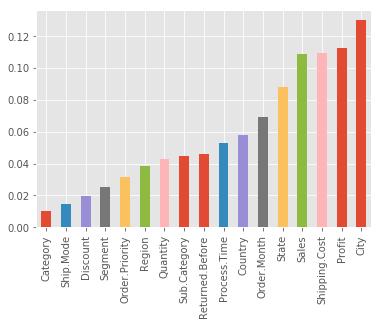

In [131]:
pd.Series(index = df_label.columns[0:-1], data = tree_1.feature_importances_).sort_values().plot(kind = 'bar')

In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:

cross_val_score(clf, iris.data, iris.target, cv=cv)

In [ ]:


train_index, test_index in kfold.split(tx, ty)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)
X_train, X_test, y_train, y_test = train_test_split(df, y_bos, test_size=0.3, random_state=42)
clf = linreg_1.fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
from sklearn import datasets
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, train_test_split
import sklearn.metrics as metrics

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_all, y_bos, test_size=0.2, random_state=42)

## Problem 7: Feature Engineering Revisit
Is there anything wrong with the new feature we generated? How should we fix it?

Hint: For the real test set, we do not know it will get returned or not.